In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
## Importing dataset
data = pd.read_spss('./secom.SAV')

In [3]:
data.head()

,ID,class,timestamp,feature001,feature002,feature003,feature004,feature005,feature006,feature007,...,feature581,feature582,feature583,feature584,feature585,feature586,feature587,feature588,feature589,feature590
0,1.0,0.0,19/07/2008 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,2.0,0.0,19/07/2008 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,3.0,1.0,19/07/2008 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,4.0,0.0,19/07/2008 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,5.0,0.0,19/07/2008 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432


### Splitting the data 30% goes for testing

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold

y = data['class']
data.drop('class', axis='columns', inplace=True)
X = data

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=.3)
X_train = X_train.copy()

pd.set_option('display.max_columns', None)

In [5]:
X_train.describe()

,ID,feature001,feature002,feature003,feature004,feature005,feature006,feature007,feature008,feature009,feature010,feature011,feature012,feature013,feature014,feature015,feature016,feature017,feature018,feature019,feature020,feature021,feature022,feature023,feature024,feature025,feature026,feature027,feature028,feature029,feature030,feature031,feature032,feature033,feature034,feature035,feature036,feature037,feature038,feature039,feature040,feature041,feature042,feature043,feature044,feature045,feature046,feature047,feature048,feature049,feature050,feature051,feature052,feature053,feature054,feature055,feature056,feature057,feature058,feature059,feature060,feature061,feature062,feature063,feature064,feature065,feature066,feature067,feature068,feature069,feature070,feature071,feature072,feature073,feature074,feature075,feature076,feature077,feature078,feature079,feature080,feature081,feature082,feature083,feature084,feature085,feature086,feature087,feature088,feature089,feature090,feature091,feature092,feature093,feature094,feature095,feature096,feature097,feature098,feature099,feature100,feature101,feature102,feature103,feature104,feature105,feature106,feature107,feature108,feature109,feature110,feature111,feature112,feature113,feature114,feature115,feature116,feature117,feature118,feature119,feature120,feature121,feature122,feature123,feature124,feature125,feature126,feature127,feature128,feature129,feature130,feature131,feature132,feature133,feature134,feature135,feature136,feature137,feature138,feature139,feature140,feature141,feature142,feature143,feature144,feature145,feature146,feature147,feature148,feature149,feature150,feature151,feature152,feature153,feature154,feature155,feature156,feature157,feature158,feature159,feature160,feature161,feature162,feature163,feature164,feature165,feature166,feature167,feature168,feature169,feature170,feature171,feature172,feature173,feature174,feature175,feature176,feature177,feature178,feature179,feature180,feature181,feature182,feature183,feature184,feature185,feature186,feature187,feature188,feature189,feature190,feature191,feature192,feature193,feature194,feature195,feature196,feature197,feature198,feature199,feature200,feature201,feature202,feature203,feature204,feature205,feature206,feature207,feature208,feature209,feature210,feature211,feature212,feature213,feature214,feature215,feature216,feature217,feature218,feature219,feature220,feature221,feature222,feature223,feature224,feature225,feature226,feature227,feature228,feature229,feature230,feature231,feature232,feature233,feature234,feature235,feature236,feature237,feature238,feature239,feature240,feature241,feature242,feature243,feature244,feature245,feature246,feature247,feature248,feature249,feature250,feature251,feature252,feature253,feature254,feature255,feature256,feature257,feature258,feature259,feature260,feature261,feature262,feature263,feature264,feature265,feature266,feature267,feature268,feature269,feature270,feature271,feature272,feature273,feature274,feature275,feature276,feature277,feature278,feature279,feature280,feature281,feature282,feature283,feature284,feature285,feature286,feature287,feature288,feature289,feature290,feature291,feature292,feature293,feature294,feature295,feature296,feature297,feature298,feature299,feature300,feature301,feature302,feature303,feature304,feature305,feature306,feature307,feature308,feature309,feature310,feature311,feature312,feature313,feature314,feature315,feature316,feature317,feature318,feature319,feature320,feature321,feature322,feature323,feature324,feature325,feature326,feature327,feature328,feature329,feature330,feature331,feature332,feature333,feature334,feature335,feature336,feature337,feature338,feature339,feature340,feature341,feature342,feature343,feature344,feature345,feature346,feature347,feature348,feature349,feature350,feature351,feature352,feature353,feature354,feature355,feature356,feature357,feature358,feature359,feature360,feature361,feature362,feature363,fea

### Basic Cleaning and formatting

In [6]:
def basic_cleaning_formatting(dataset):
    ## Deleting ID and TimeSpan Columns no needed
    dataset.drop(['ID', 'timestamp'], axis='columns', inplace=True)

## :::: FEATURE REDUCTION :::: 

### Nulls Treatment / Features lower than certain percentage will be deleted

In [7]:
import missingno as msno

def delete_features_too_many_nulls(dataSet, percentage):
    msno.matrix(dataSet)
    plt.show()
    
    features_to_delete = []

    for col in dataSet.columns:
        missing_percentage = 100 * (dataSet[col].isna().sum() / len(dataSet[col]))
        if (missing_percentage > percentage):
            features_to_delete.append(col)
            dataSet.drop(col, axis=1, inplace=True)
            
    print(f"# Features deleted with more than {percentage} % missing values", len(features_to_delete))

    return features_to_delete


### Variance / Features lower than the threashold will be deleted 

In [8]:
# Here what we want to do is to delete the features with a certain threashold that has no variance
# example we have a feature and a threashold of 80% then the interpretation would be
# we want to delete the features whose values are equal in more than 80% of the dataset 
# As an example, suppose that we have a dataset with boolean features, and we want to remove all features that are either one or zero (on or off) in more than 80% of the samples.
# Here's the formula = Var[X] = p(1-p) .8 * (1 - .8):

def remove_features_low_variance(dataSet, threashold):
    
    initialLen = dataSet.shape[1]
    normalized_df = dataSet / dataSet.mean()
    
    var_threashold = threashold * (1 - threashold)
    
    # Create a VarianceThreshold feature selector
    sel = VarianceThreshold(threshold=var_threashold)

    # Fit the selector to normalized head_df
    sel.fit(normalized_df)

    # Create a boolean mask
    mask = sel.get_support()

    # Apply the mask to create a reduced dataframe
    features_low_variance = dataSet.loc[:, ~mask].columns
    
    dataSet.drop(features_low_variance, axis=1, inplace=True)

    print("Dimensionality reduced from {} to {}.".format(initialLen, dataSet.shape[1]))
    
    
    return features_low_variance

## :::: IMPUTATION ::::

### Imputation of Data / Using KNN

In [9]:
from sklearn.impute import KNNImputer

def impute_values_knn(dataSet, target, n_neighbors):
    imputer = KNNImputer(n_neighbors=n_neighbors)

    df = pd.concat([dataSet, target], axis=1)
    df_imputed = pd.DataFrame(imputer.fit_transform(df),columns = df.columns)
    
    return df_imputed


## :::: FEATURE SELECTION BORUTA ::::

### Feature Selection & Model Random Forest

In [10]:
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier
import numpy as np

def select_features_boruta(X_train, y_train, depth_tree=5, max_iter=100, n_estimators= 'auto'):
    ###initialize Boruta
    forest = RandomForestClassifier(
       n_jobs = -1, 
       max_depth = depth_tree
    )
    boruta = BorutaPy(
       estimator = forest, 
       n_estimators = 'auto',
       max_iter = max_iter # number of trials to perform
    )

    ### fit Boruta (it accepts np.array, not pd.DataFrame)
    boruta.fit(np.array(X_train), np.array(y_train))

    ### print results
    green_area = X_train.columns[boruta.support_].to_list()
    blue_area = X_train.columns[boruta.support_weak_].to_list()

    print('features in the green area:', green_area)
    print('features in the blue area:', blue_area)
    print('features in total kept:', len(green_area) + len(blue_area))
    
    return green_area + blue_area
    

## :::: BALANCE DATASET ::::

### Treat imbalanced Data / OverSampling

In [11]:
from imblearn.over_sampling import SMOTE 

def balance_dataset(dataSet, target):
    sm = SMOTE(random_state=42)
    dataSet_sm, target_sm = sm.fit_resample(dataSet, target)

    print(':::: After Balancing Dataset Using SMOTE :::::')
    target_sm.value_counts().plot.bar(color=['purple', 'yellow'])
    
    
    return dataSet_sm, target_sm

## :::: CRISP STEPS EXECUTION ::::

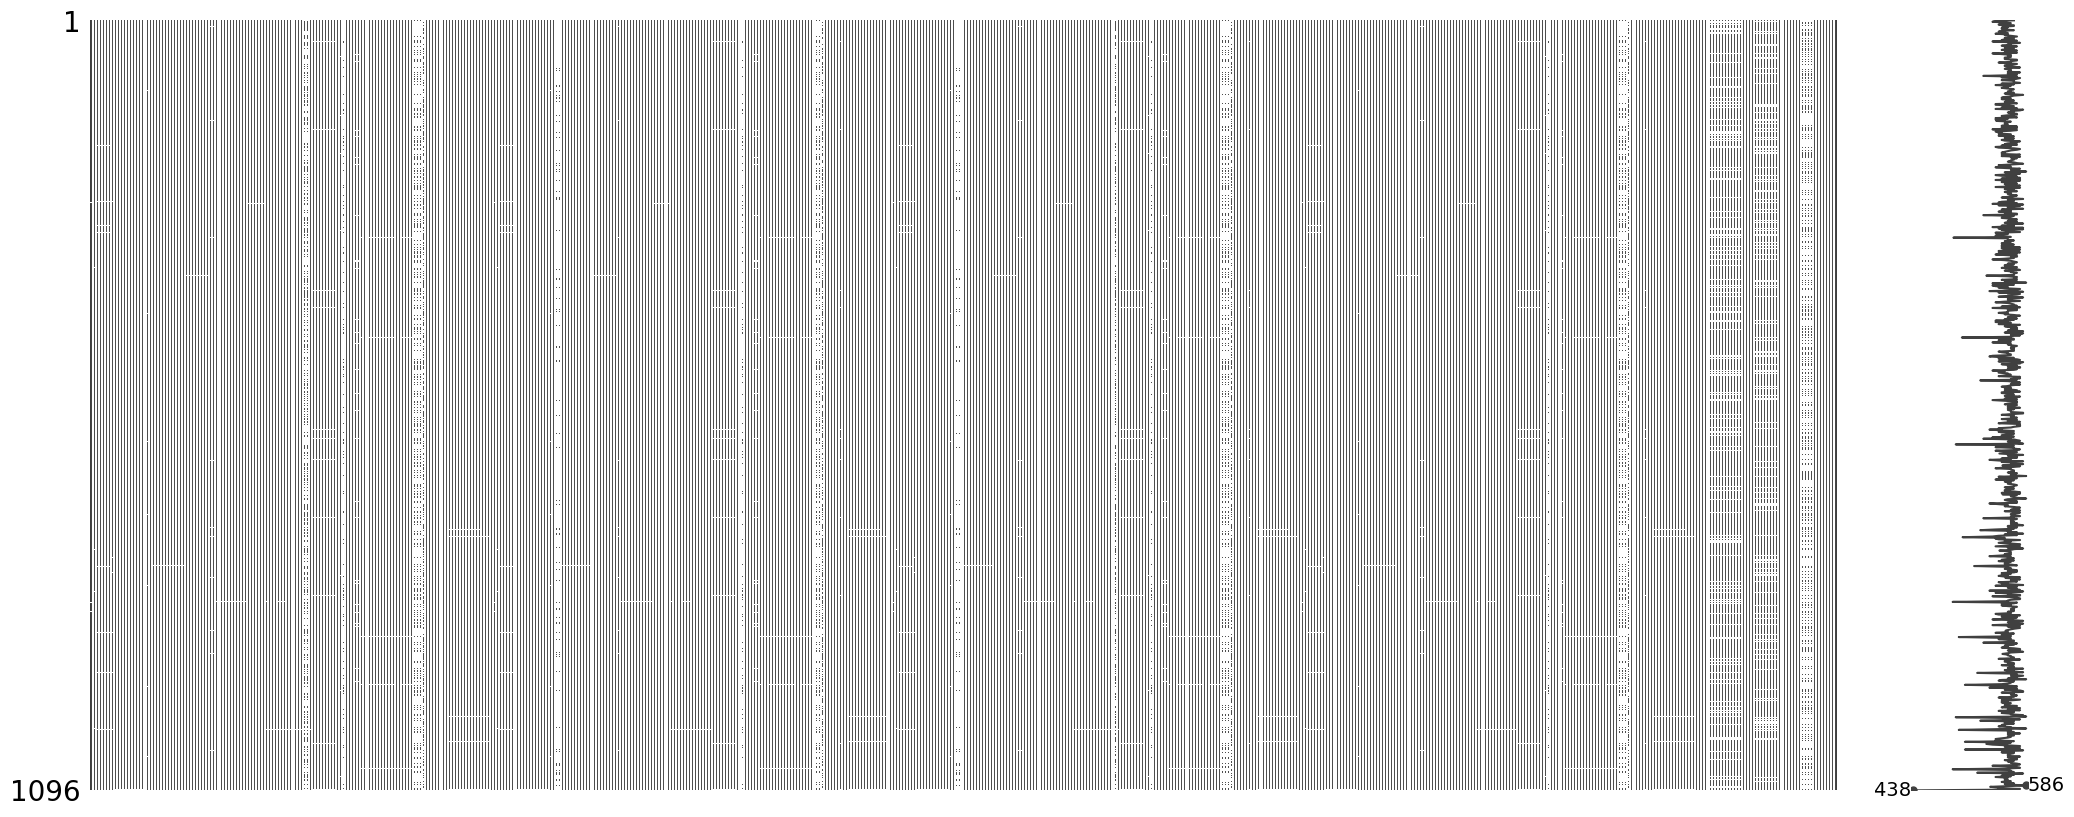

# Features deleted with more than 55 % missing values 24
Dimensionality reduced from 566 to 344.


/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_variance_threshold.py:78: RuntimeWarning: Degrees of freedom <= 0 for slice.
  self.variances_ = np.nanvar(X, axis=0)


In [ ]:
## Step 1 :: CLEAN AND FORMATTING ::
basic_cleaning_formatting(X_train)

## Step 2  :: HANDLING NULLS ::
nulls_features_to_drop = delete_features_too_many_nulls(X_train, percentage=55)

## Step 3  :: LOW VARIANCE FEATURES ::
low_variance_features_to_drop = remove_features_low_variance(X_train, threashold=0.95)

## Step 5  :: KNN IMPUTATION ::
dataImputed = impute_values_knn(X_train, y_train, n_neighbors=5)
y_train = dataImputed['class']
X_train = dataImputed.drop('class', axis='columns')

## Step 6 :: BORUTA FEATURE SELECTION :::
features_to_keep = select_features_boruta(X_train, y_train, depth_tree=5, max_iter=500)
X_train = X_train[features_to_keep]

## Step 7 :: BALANCING :::
X_train, y_train =  balance_dataset(X_train, y_train) 

### Applying same steps to Test Data

In [ ]:
## Step 1 :: CLEAN AND FORMATTING ::
basic_cleaning_formatting(X_test)

## Step 2 :: USING SELECTED FEATURES FOR TRAIN DATA ::
X_test = X_test[features_to_keep]

## Step 3  :: KNN IMPUTATION ::
dataImputed = impute_values_knn(X_test, y_test, n_neighbors=5)
y_test = dataImputed['class']
X_test = dataImputed.drop('class', axis='columns')

## Step 7 :: BALANCING :::
X_test, y_test =  balance_dataset(X_test, y_test) 

 

## :::: MODELING ::::

### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

model = RandomForestClassifier(n_jobs = -1, max_depth = 5, random_state=42)
model.fit(X_train, y_train)
preds = model.predict(X_test)

print(f'Accuracy = {accuracy_score(y_test, preds):.2f}\nRecall = {recall_score(y_test, preds):.2f}\n')
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (with SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');